# Imports

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importando as bibliotecas
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RainierResende/dataset-heart-attack/main/heart.csv"

# Lê o arquivo CSV e cria o dataframe
df = pd.read_csv(url, delimiter=",")

# Mostra as primeiras linhas do dataframe
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # 20% para teste
seed = 7 # Seed para o random_state

# Separa em conjunto de treino e teste
array = df.values
X = array[:,0:13]
Y = array[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, stratify=Y) # stratify para manter a proporção das classes

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, random_state=seed, shuffle=True) # Validação cruzada estratificada

# Modelagem e Inferência

## Criação e avaliação de modelos: linha base

KNN: 0.636 (0.085)
NB: 0.826 (0.101)
CART: 0.793 (0.078)
SVM: 0.636 (0.079)


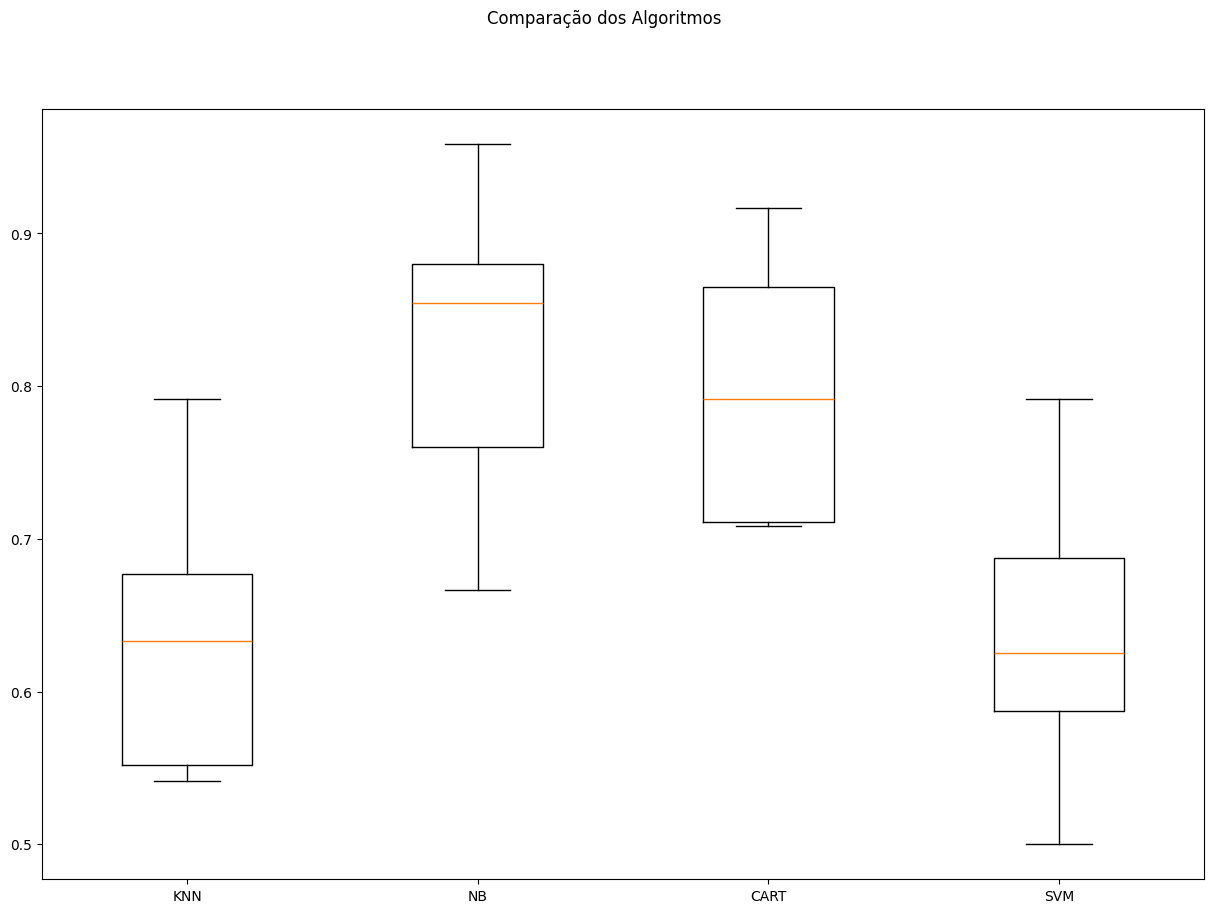

In [4]:
np.random.seed(seed) # Seed para o random_state

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Lista que armazenará os resultados e nomes dos modelos
results = []
names = []

# Avaliando cada modelo
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.636 (0.085)
NB-orig: 0.826 (0.101)
CART-orig: 0.793 (0.078)
SVM-orig: 0.636 (0.079)
KNN-StandardScaler: 0.810 (0.073)
NB-StandardScaler: 0.826 (0.101)
CART-StandardScaler: 0.822 (0.081)
SVM-StandardScaler: 0.825 (0.093)
KNN-MinMaxScaler: 0.830 (0.072)
NB-MinMaxScaler: 0.826 (0.101)
CART-MinMaxScaler: 0.809 (0.082)
SVM-MinMaxScaler: 0.846 (0.088)


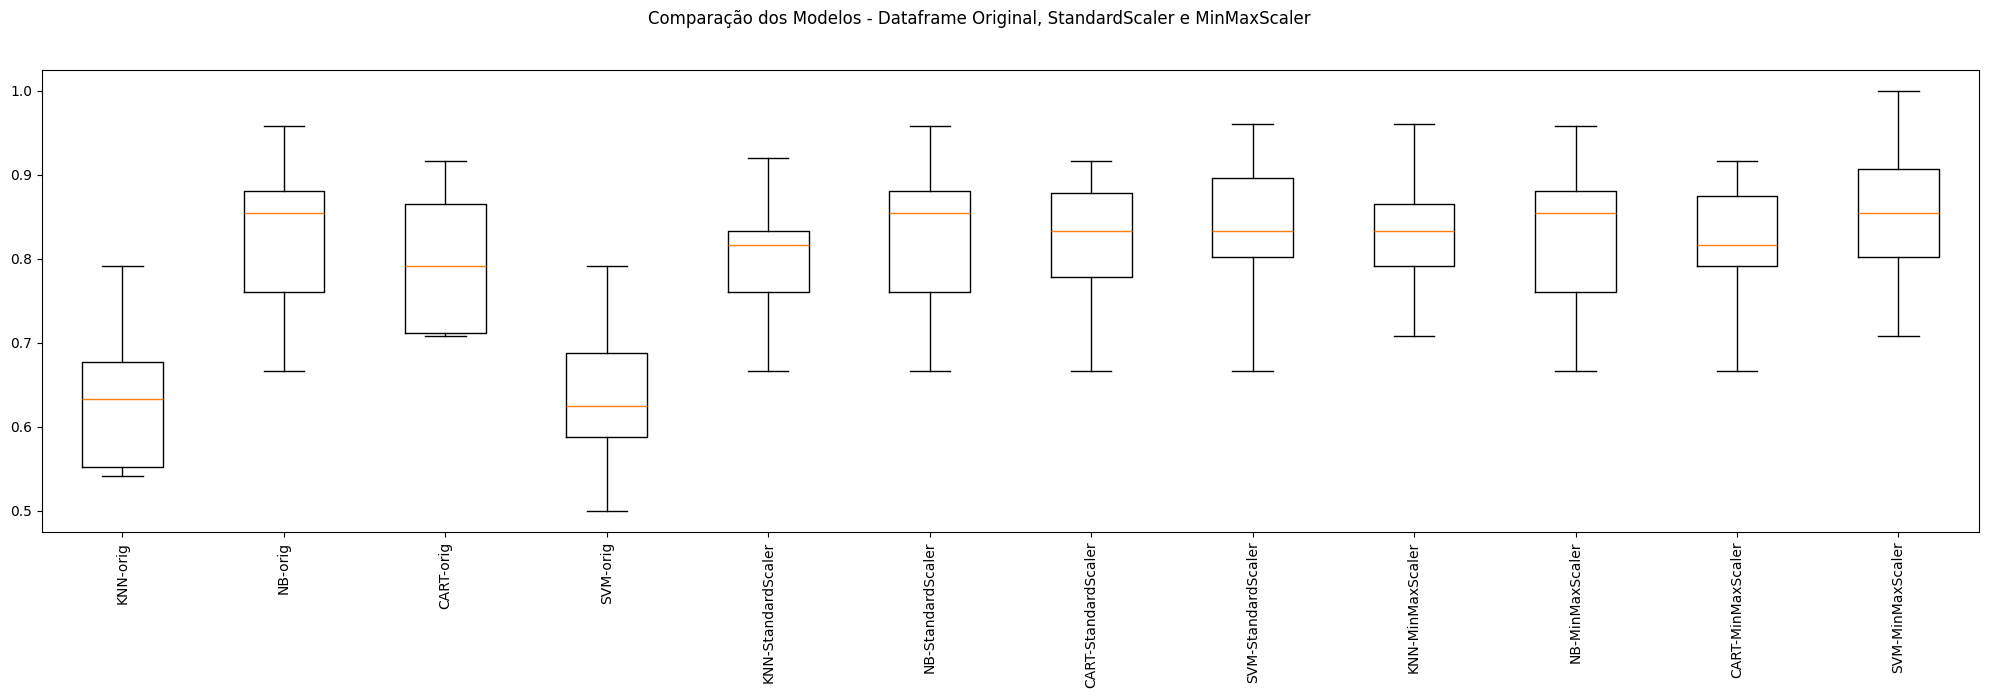

In [5]:
np.random.seed(seed) # Seed para o random_state

# Lista que armazenará os pipelines e os resultados
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados no pipeline
knn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVC())

# Transformações que serão utilizadas no pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Criando os pipelines e adicionando-os na lista de pipelines
# Dataframe original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataframe com StandardScaler
pipelines.append(('KNN-StandardScaler', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-StandardScaler', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('CART-StandardScaler', Pipeline([standard_scaler, cart])))
pipelines.append(('SVM-StandardScaler', Pipeline([standard_scaler, svm])))

# Dataframe com MinMaxScaler
pipelines.append(('KNN-MinMaxScaler', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-MinMaxScaler', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('CART-MinMaxScaler', Pipeline([min_max_scaler, cart])))
pipelines.append(('SVM-MinMaxScaler', Pipeline([min_max_scaler, svm])))

# Executando os pipelines e armazenando os resultados
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataframe Original, StandardScaler e MinMaxScaler')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização dos hiperparâmetros

In [6]:
# Tuning do modelo SVM

np.random.seed(seed) # Seed para o random_state

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('SVM-Original', Pipeline([svm])))
pipelines.append(('SVM-StandardScaler', Pipeline([standard_scaler, svm])))
pipelines.append(('SVM-MinMaxScaler', Pipeline([min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['rbf', 'poly', 'sigmoid']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, Y_train)
    # Imprime os resultados
    print("%s - Melhor: %.3f utilizando %s" % (name, grid.best_score_, grid.best_params_))

SVM-Original - Melhor: 0.789 utilizando {'SVM__C': 100, 'SVM__kernel': 'poly'}
SVM-StandardScaler - Melhor: 0.825 utilizando {'SVM__C': 1, 'SVM__kernel': 'rbf'}
SVM-MinMaxScaler - Melhor: 0.846 utilizando {'SVM__C': 1, 'SVM__kernel': 'rbf'}


# Finalização do Modelo

In [8]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1, kernel='rbf')
model.fit(rescaledX, Y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print("Acurácia: %.3f" % (accuracy_score(Y_test, predictions)))

Acurácia: 0.787


In [9]:
# Preparação do modelo com TODO o conjunto de dados
scaler = MinMaxScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, Y)

SVC(C=1)

# Geração do modelo

In [ ]:
pickle_out = open("modelo_heart_attack.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()